<a href="https://colab.research.google.com/github/JhonierCordoba/creditCardFraud/blob/main/02_Preprocesado_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalamos Kaggle

In [1]:
!pip install -q kaggle

## Obtener el kaggle.json

A partir de aquí tenemos dos opciones

### Opción 1

Descargamos nuestro token de Kaggle desde https://www.kaggle.com/settings/account, en el botón `Create New Token`

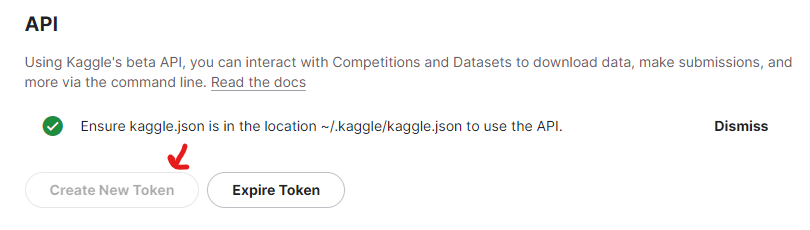

Y lo cargamos

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jhoniercordoba","key":"cc68c1c24a456b89809451e559a93545"}'}

### Opción 2

Descargamos el `kaggle.json` de uno de los integrantes del equipo (Jhonier Córdoba) y lo usamos

In [3]:
!gdown 1WGDJbebCShFyozKKRJW3p78wJhwrZA12

Downloading...
From: https://drive.google.com/uc?id=1WGDJbebCShFyozKKRJW3p78wJhwrZA12
To: /content/kaggle.json
100% 67.0/67.0 [00:00<00:00, 289kB/s]


### Configuración del archivo para API de Kaggle

Configuramos el archivo de API de Kaggle

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Descargamos el ZIP con los datasets del Kaggle

In [5]:
!kaggle competitions download -c playground-series-s3e4

 78% 66.0M/84.1M [00:01<00:00, 69.1MB/s]
100% 84.1M/84.1M [00:01<00:00, 61.4MB/s]


Y los extraemos para poder usar `train.csv`

In [6]:
!unzip playground-series-s3e4.zip

Archive:  playground-series-s3e4.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


Importamos las librerías necesarias

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Consegumos el dataset

In [8]:
df = pd.read_csv('train.csv')

# Simulación de datos

Empezamos simulando un rango de monto pagado (bajo, medio, alto)

In [9]:
bins = [0, 50, 200, float('inf')]
labels = ['Bajo', 'Medio', 'Alto']
df['AmountRange'] = pd.cut(df['Amount'], bins=bins, labels=labels)
df

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,AmountRange
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0,Bajo
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0,Medio
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0,Bajo
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0,Bajo
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0,Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,219124,120580.0,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,...,-0.456538,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65,0,Medio
219125,219125,120580.0,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,...,1.478823,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00,0,Bajo
219126,219126,120580.0,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,...,-0.965783,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79,0,Bajo
219127,219127,120580.0,2.079227,-2.162389,-1.785833,-2.804889,0.552845,4.038013,-2.155900,1.023785,...,0.590401,0.286621,0.675660,-0.510736,-0.090044,0.056749,-0.017126,88.00,0,Medio


También simulamos el medio donde se hizo la transacción

In [10]:
medios = ['En línea', 'Supermercado', 'Restaurante']
np.random.seed(0)
df['Medio'] = np.random.choice(medios, size=len(df))
df

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V23,V24,V25,V26,V27,V28,Amount,Class,AmountRange,Medio
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0,Bajo,En línea
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0,Medio,Supermercado
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0,Bajo,En línea
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0,Bajo,Supermercado
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0,Bajo,Supermercado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,219124,120580.0,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,...,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65,0,Medio,Supermercado
219125,219125,120580.0,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,...,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00,0,Bajo,Supermercado
219126,219126,120580.0,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,...,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79,0,Bajo,Restaurante
219127,219127,120580.0,2.079227,-2.162389,-1.785833,-2.804889,0.552845,4.038013,-2.155900,1.023785,...,0.286621,0.675660,-0.510736,-0.090044,0.056749,-0.017126,88.00,0,Medio,Restaurante


También simulamos el tipo de tarjeta usada para la transacción

In [11]:
tipos_tarjeta = ['Débito', 'Crédito', 'Prepagada']
np.random.seed()
df['TipoTarjeta'] = np.random.choice(tipos_tarjeta, size=len(df))
df

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V24,V25,V26,V27,V28,Amount,Class,AmountRange,Medio,TipoTarjeta
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0,Bajo,En línea,Débito
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0,Medio,Supermercado,Prepagada
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0,Bajo,En línea,Crédito
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0,Bajo,Supermercado,Prepagada
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0,Bajo,Supermercado,Prepagada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,219124,120580.0,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,...,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65,0,Medio,Supermercado,Prepagada
219125,219125,120580.0,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,...,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00,0,Bajo,Supermercado,Débito
219126,219126,120580.0,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,...,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79,0,Bajo,Restaurante,Crédito
219127,219127,120580.0,2.079227,-2.162389,-1.785833,-2.804889,0.552845,4.038013,-2.155900,1.023785,...,0.675660,-0.510736,-0.090044,0.056749,-0.017126,88.00,0,Medio,Restaurante,Débito


# Simulación de datos faltantes

Ahora simularemos el 5% de datos faltantes en las columnas categóricas 'Medio', 'TipoTarjeta' y 'AmountRange', ya que son columnas donde se espera que puedan faltar datos en un escenario real.

In [12]:
np.random.seed()
columns_with_nans = ['Medio', 'TipoTarjeta', 'AmountRange']

porcentaje_nans = np.random.uniform(5, 15)
num_nan_rows = int((porcentaje_nans / 100) * len(df))

for column in columns_with_nans:
    nan_indices = np.random.choice(df.index, size=num_nan_rows, replace=False)
    df.loc[nan_indices, column] = np.nan

df

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V24,V25,V26,V27,V28,Amount,Class,AmountRange,Medio,TipoTarjeta
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0,Bajo,En línea,Débito
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0,Medio,Supermercado,Prepagada
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0,Bajo,En línea,NaN
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0,NaN,Supermercado,Prepagada
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0,Bajo,Supermercado,Prepagada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,219124,120580.0,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,...,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65,0,NaN,NaN,NaN
219125,219125,120580.0,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,...,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00,0,Bajo,Supermercado,Débito
219126,219126,120580.0,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,...,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79,0,Bajo,Restaurante,NaN
219127,219127,120580.0,2.079227,-2.162389,-1.785833,-2.804889,0.552845,4.038013,-2.155900,1.023785,...,0.675660,-0.510736,-0.090044,0.056749,-0.017126,88.00,0,Medio,Restaurante,Débito
